In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/DataBase.csv')

In [30]:
Y = df['Class/ASD']

In [31]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [32]:
df.shape

(800, 22)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [34]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [35]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [36]:
# This code for identity the vlues in each column

for col in df.columns:
  print(df[col].value_counts())
  print("----------------------------------------")

ID
784    1
783    1
782    1
781    1
780    1
      ..
5      1
4      1
3      1
2      1
1      1
Name: count, Length: 800, dtype: int64
----------------------------------------
A1_Score
1    466
0    334
Name: count, dtype: int64
----------------------------------------
A2_Score
0    571
1    229
Name: count, dtype: int64
----------------------------------------
A3_Score
0    543
1    257
Name: count, dtype: int64
----------------------------------------
A4_Score
0    468
1    332
Name: count, dtype: int64
----------------------------------------
A5_Score
0    434
1    366
Name: count, dtype: int64
----------------------------------------
A6_Score
0    633
1    167
Name: count, dtype: int64
----------------------------------------
A7_Score
0    581
1    219
Name: count, dtype: int64
----------------------------------------
A8_Score
1    574
0    226
Name: count, dtype: int64
----------------------------------------
A9_Score
0    547
1    253
Name: count, dtype: int64
-------------

In [37]:
df = df.replace({'yes' : 1, 'no' : 0, 'others' : 'Others', '?' : 'Others'})

In [38]:
for col in df.columns:
  print(df[col].value_counts())
  print("----------------------------------------")

ID
784    1
783    1
782    1
781    1
780    1
      ..
5      1
4      1
3      1
2      1
1      1
Name: count, Length: 800, dtype: int64
----------------------------------------
A1_Score
1    466
0    334
Name: count, dtype: int64
----------------------------------------
A2_Score
0    571
1    229
Name: count, dtype: int64
----------------------------------------
A3_Score
0    543
1    257
Name: count, dtype: int64
----------------------------------------
A4_Score
0    468
1    332
Name: count, dtype: int64
----------------------------------------
A5_Score
0    434
1    366
Name: count, dtype: int64
----------------------------------------
A6_Score
0    633
1    167
Name: count, dtype: int64
----------------------------------------
A7_Score
0    581
1    219
Name: count, dtype: int64
----------------------------------------
A8_Score
1    574
0    226
Name: count, dtype: int64
----------------------------------------
A9_Score
0    547
1    253
Name: count, dtype: int64
-------------

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    int64  
 15  austim           800 non-null    int64  
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

## Outliers Detection

In our data only two columns has they change to contain outliers, Beacuse remaining columns has finite vlues



In [40]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [41]:
# Collect all column who data type float

float_col = []

for col in df.columns:
  if df[col].dtype == 'float64':
    float_col.append(col)

In [42]:
float_col

['age', 'result']

In [43]:
#   Line	                                 Purpose

# *   plt.subplots(figsize=(15,5))      :- 	     Set figure size
# *   for i, col in enumerate(floats)   :-	     Loop through float columns
# *   plt.subplot(1,2,i+1)              :-	     Place plots side-by-side
# *   sb.boxplot(df[col])               :-	     Plot boxplot of each column
# *   plt.tight_layout()                :-	     Avoid overlapping plots
# *   plt.show()                        :-	     Show all plots

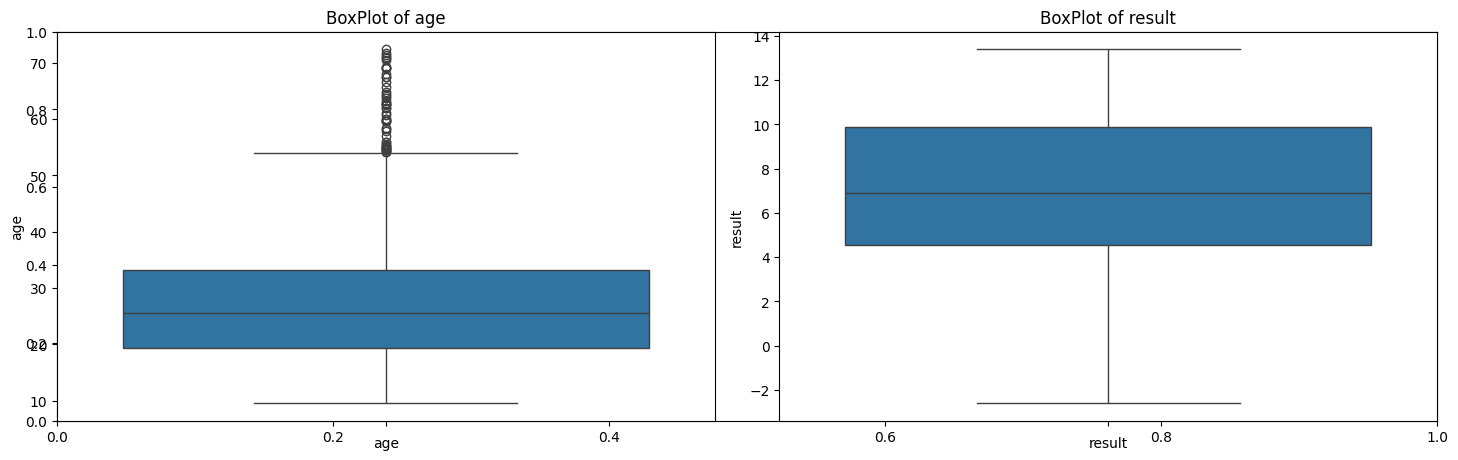

In [44]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(float_col):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
  plt.xlabel(col)
  plt.title(f"BoxPlot of {col}")

plt.tight_layout()
plt.show()


In [45]:
def outlier_remover(x, col):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  print(f"Column : {col}")
  print(f"Lower limit : {lower_bound}, Upper limit : {upper_bound} ")
  print(f"Minimum value : {x.min()}, Maximum value : {x.max()}")

  if (x.min() >= lower_bound):
    print("Lower limit pass :- No need to remove outliers ")
  else :
    print("Lower limit fail :- need to remove outliers")
    # df.drop(x[x < lower_bound].index,inplace=True)
    # df.loc[[x < lower_bound].index] = lower_bound
    df.loc[df[col] < lower_bound, col] = lower_bound

  if (x.max() <= upper_bound):
    print("upper limit pass :- No need to remove outliers")
  else :
    print("upper limit fail :- need to remove outliers")
    # df.drop(x[x > upper_bound].index,inplace=True)
    # df.loc[x[x > upper_bound].index] = upper_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

In [46]:
for col in float_col:
  outlier_remover(df[col], col)
  print("------------------------------------------------")

Column : age
Lower limit : -1.5269289549999954, Upper limit : 53.963765945 
Minimum value : 9.560504591, Maximum value : 72.40248841
Lower limit pass :- No need to remove outliers 
upper limit fail :- need to remove outliers
------------------------------------------------
Column : result
Lower limit : -3.520581798375, Upper limit : 17.941118566625 
Minimum value : -2.594654288, Maximum value : 13.3908679
Lower limit pass :- No need to remove outliers 
upper limit pass :- No need to remove outliers
------------------------------------------------


**Recheacking of outliers is remove or not**

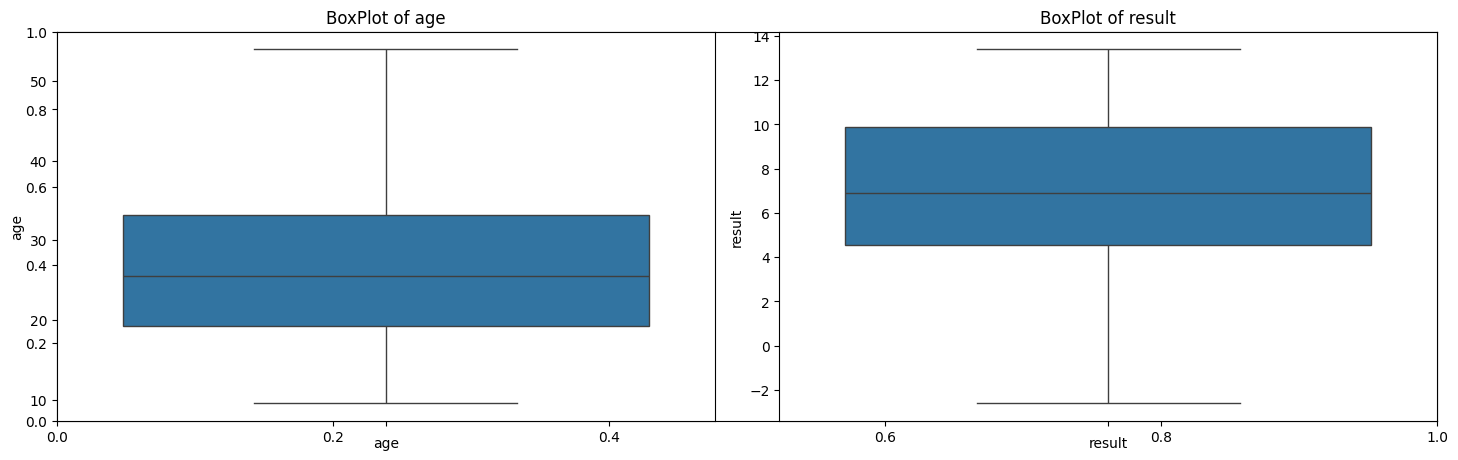

In [47]:

plt.subplots(figsize=(15,5))

for i, col in enumerate(float_col):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
  plt.xlabel(col)
  plt.title(f"BoxPlot of {col}")

plt.tight_layout()
plt.show()


In [48]:
for col in float_col:
  outlier_remover(df[col], col)
  print("------------------------------------------------")

Column : age
Lower limit : -1.5269289549999954, Upper limit : 53.963765945 
Minimum value : 9.560504591, Maximum value : 53.963765945
Lower limit pass :- No need to remove outliers 
upper limit pass :- No need to remove outliers
------------------------------------------------
Column : result
Lower limit : -3.520581798375, Upper limit : 17.941118566625 
Minimum value : -2.594654288, Maximum value : 13.3908679
Lower limit pass :- No need to remove outliers 
upper limit pass :- No need to remove outliers
------------------------------------------------


**Histogram + KDE Plot (Best for Skewness)**

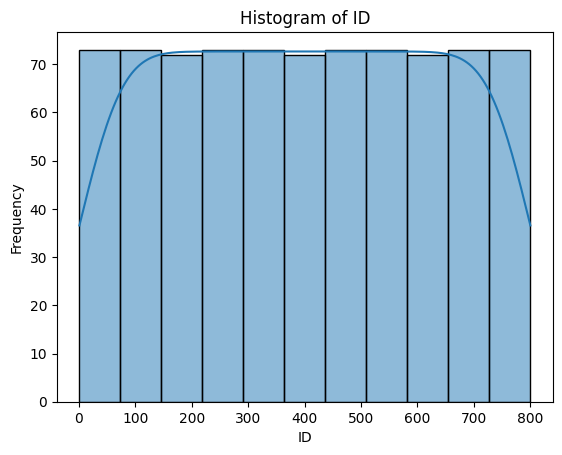

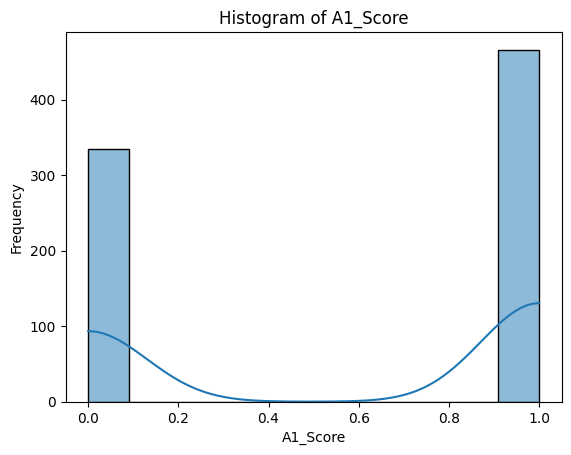

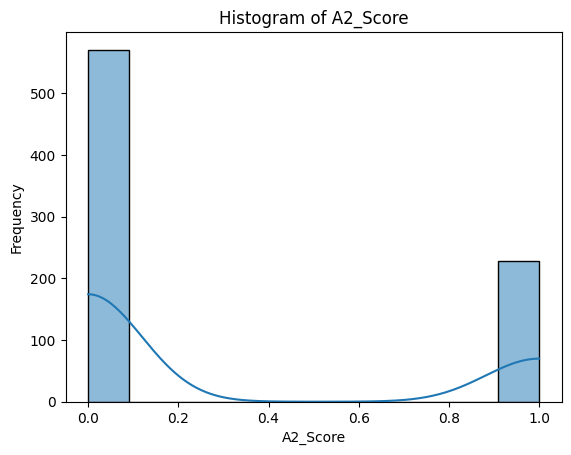

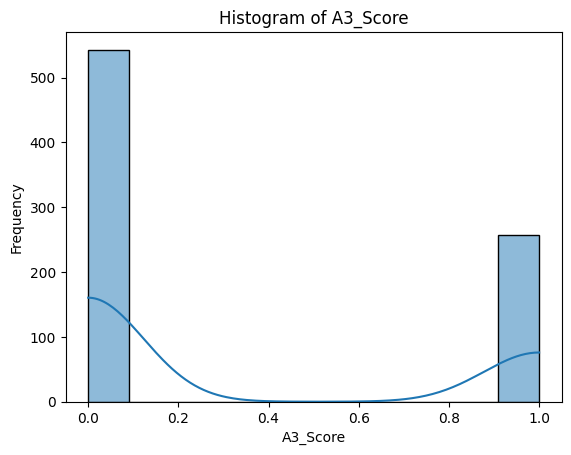

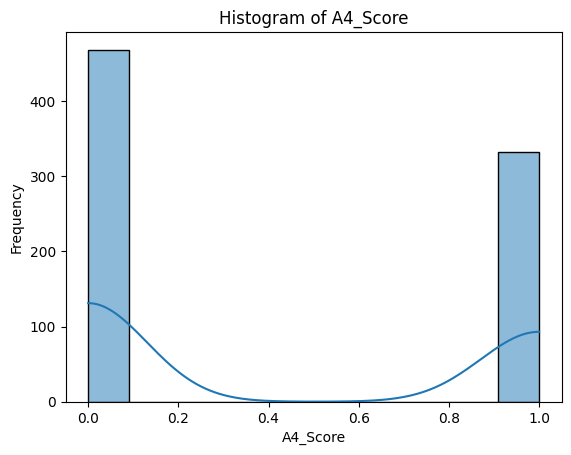

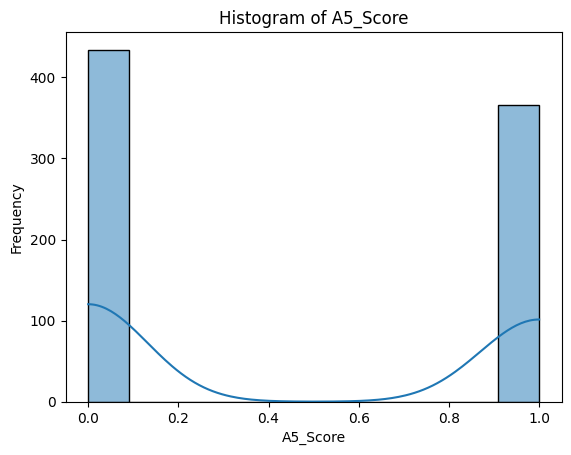

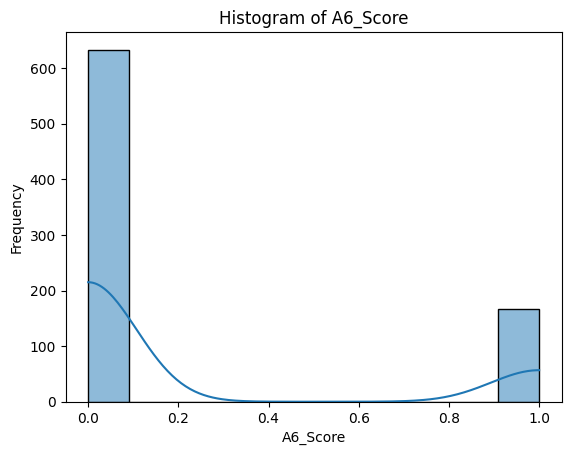

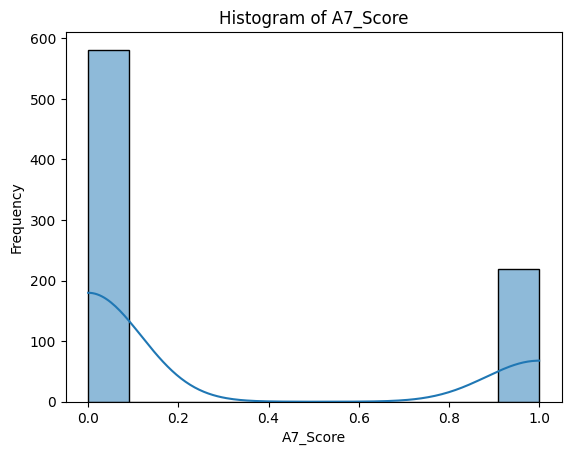

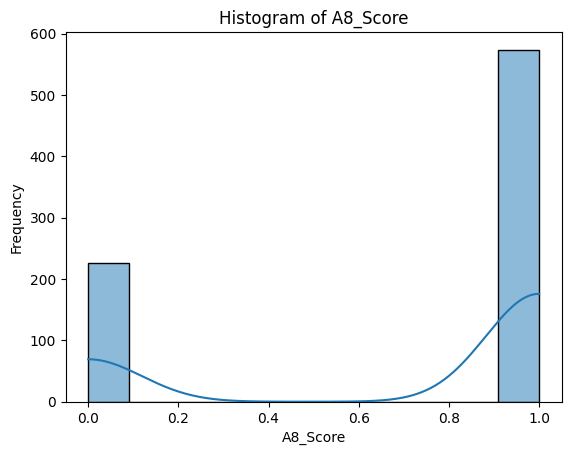

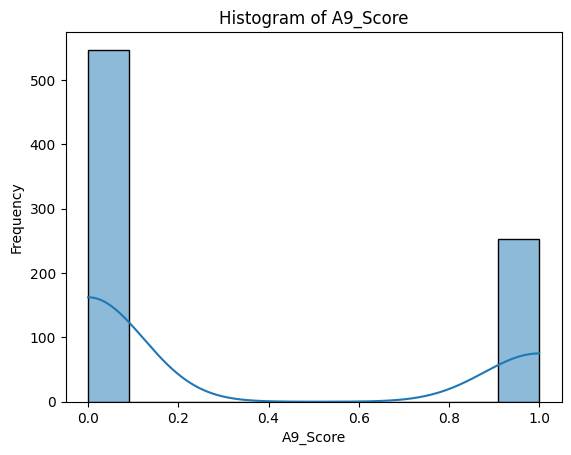

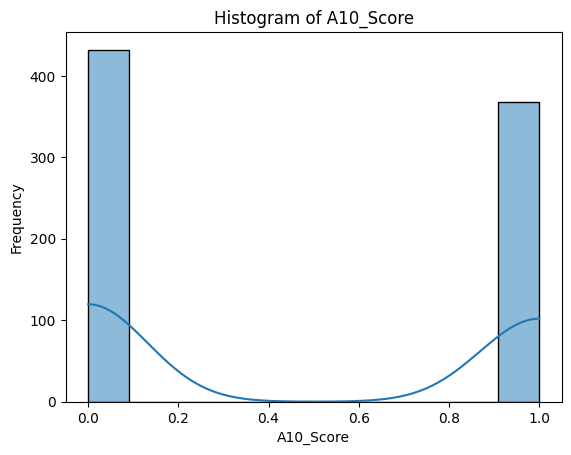

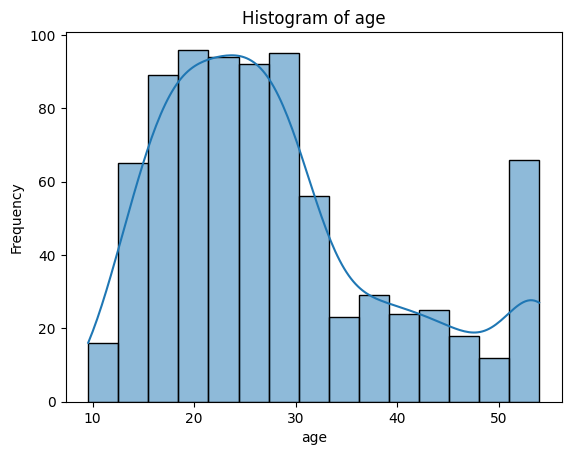

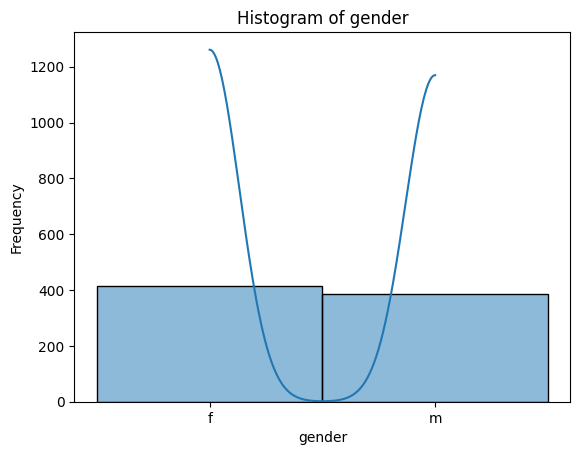

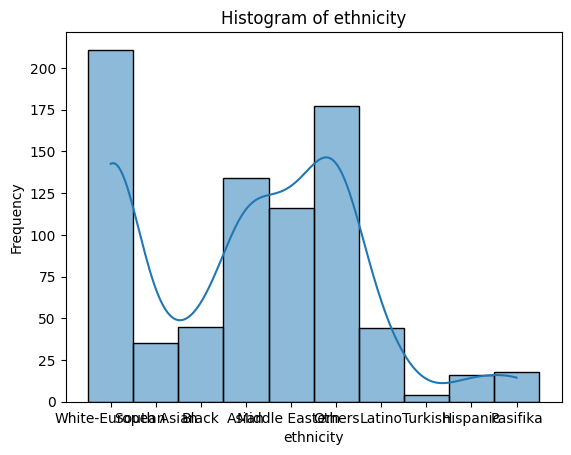

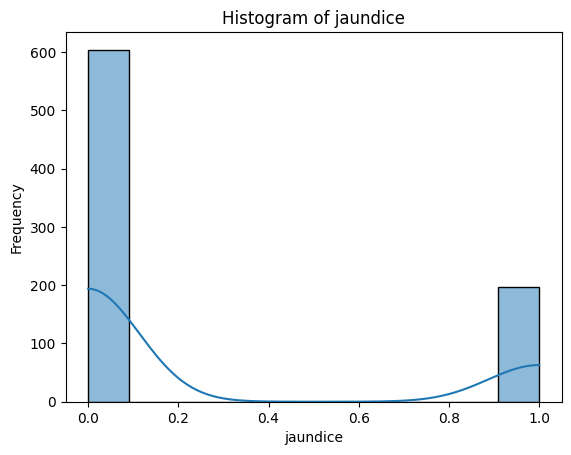

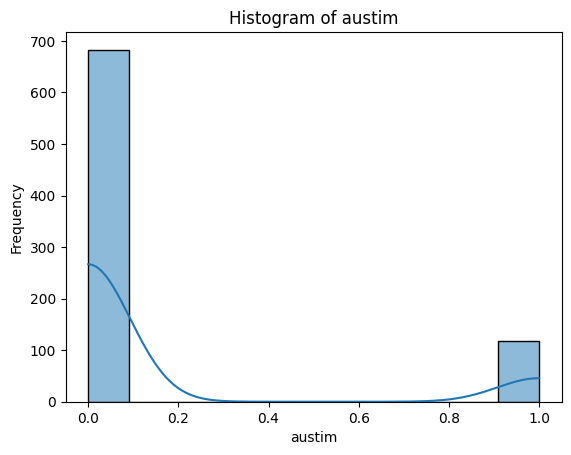

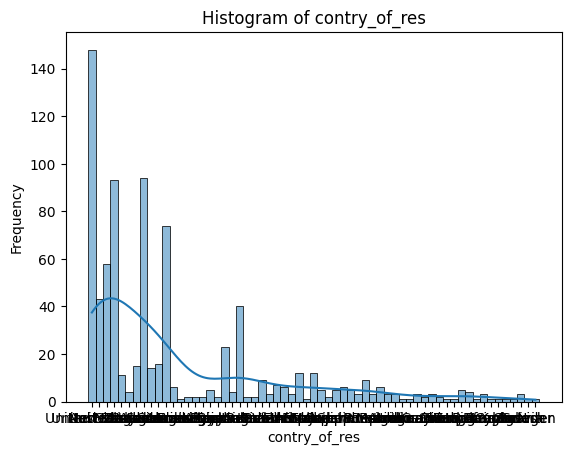

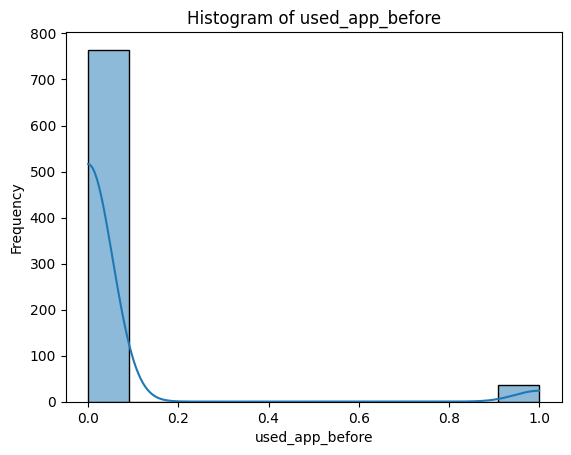

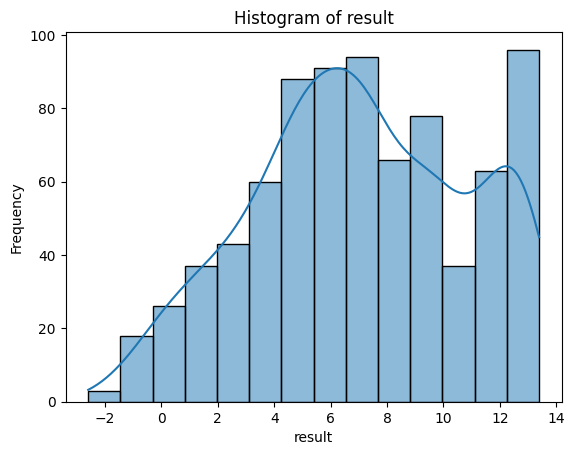

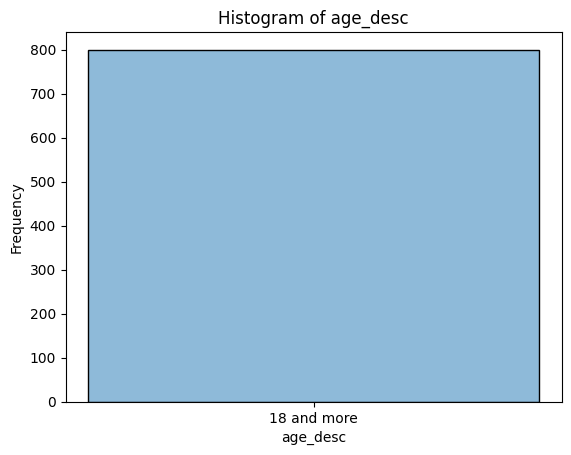

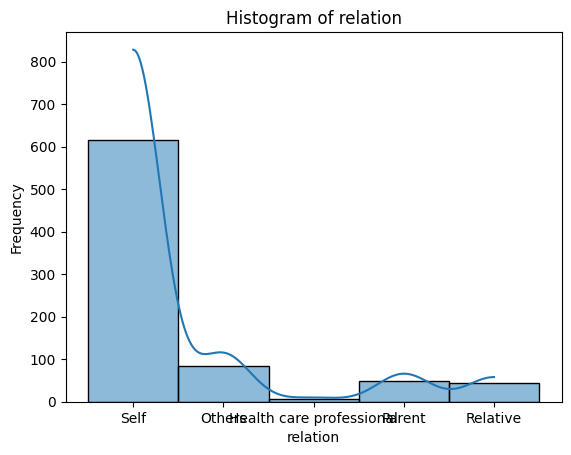

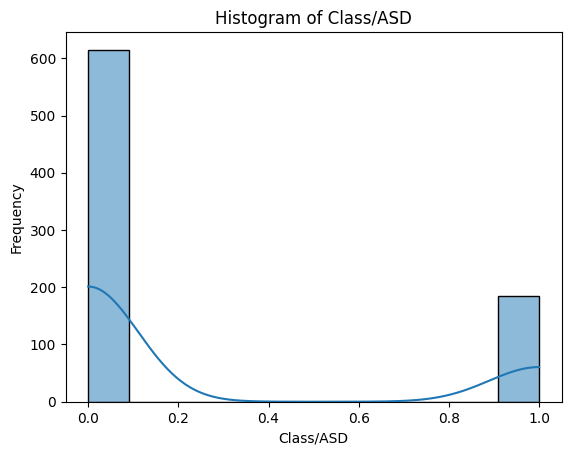

In [49]:
for col in df.columns:
  sb.histplot(df[col], kde = True)
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()


**Now we remove skew form Age and Result columns**

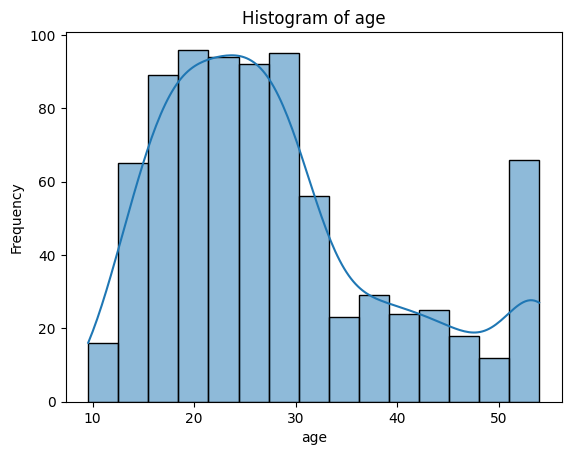

In [50]:
# Age Histrogram before tranform

sb.histplot(df['age'], kde = True)
plt.title(f"Histogram of age")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.show()


In [51]:
print(df['age'].skew())

0.8612338118466265


## **Apply tranformation**

As comper square, sqrt, log2 is better

In [52]:
df['age'] = np.log2(df['age'])
# df['age']

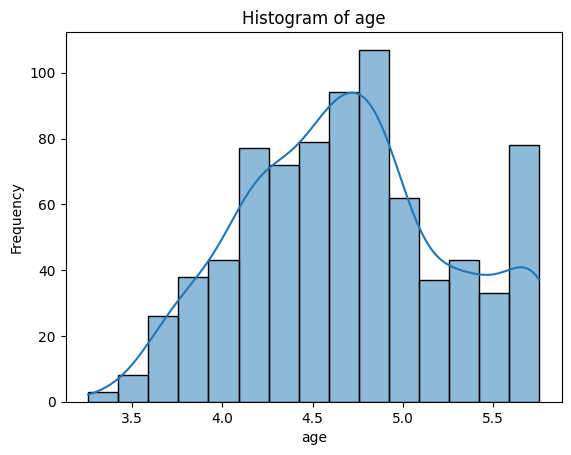

In [53]:
# After tranformation

sb.histplot(df['age'], kde = True)
plt.title(f"Histogram of age")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.show()

In [54]:
df['age'].skew()

np.float64(0.13396469971885963)

## **Apply tranformation**

In [55]:
print(df['result'].skew())

-0.11433843012677607


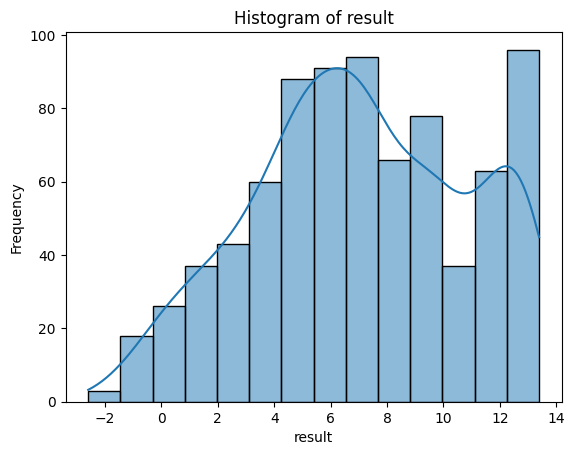

In [56]:
sb.histplot(df['result'], kde = True)
plt.title(f"Histogram of result")
plt.xlabel('result')
plt.ylabel("Frequency")
plt.show()

**After Tranformation vlaue of skewness is increses**

In [57]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# df['result'] = pt.fit_transform(df[['result']])
# print(df['result'].skew())

# output : -0.1611012086696145

## **Label-Encoding**

In [58]:
# Collected all columns whose data type is object

String_col = []

for col in df.columns:
  if df[col].dtype == 'object':
    String_col.append(col)

In [59]:
for col in String_col:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,9,0,0,58,0,7.819715,0,4,0
1,2,0,0,0,0,0,0,0,0,0,...,0,7,0,0,6,0,10.544296,0,1,0
2,3,1,1,1,1,1,1,0,0,1,...,0,9,0,0,57,0,13.167506,0,4,1
3,4,0,0,0,1,0,0,0,0,0,...,0,7,0,0,39,0,1.530098,0,1,0
4,5,0,0,0,0,1,0,0,0,1,...,1,1,0,1,32,0,7.949723,0,4,0


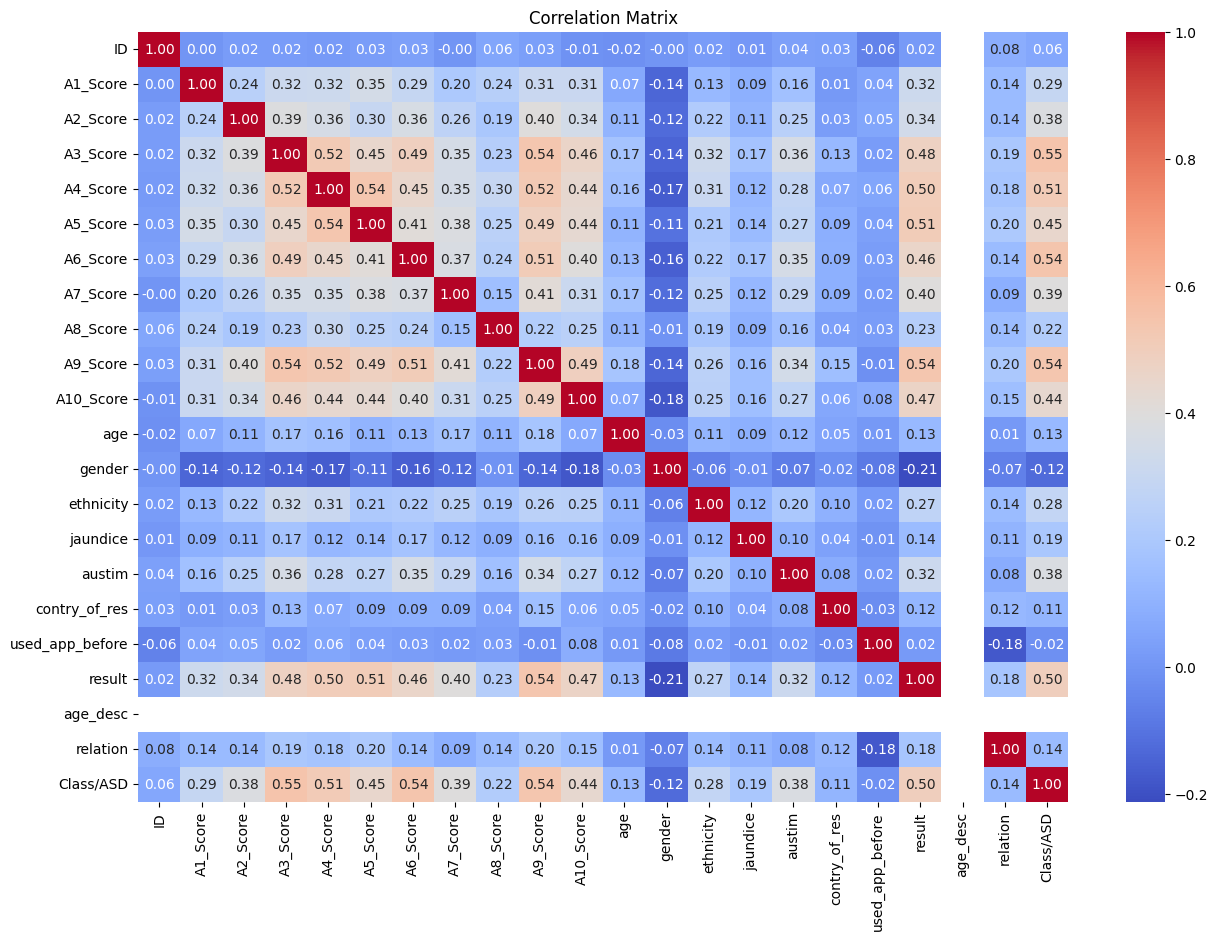

In [61]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [62]:
# Here we print only one column form above metrix that is "Class/ASD" for checking the correlation with other columns

target_columns = corr_matrix["Class/ASD"]

In [63]:
target_columns

,Class/ASD
ID,0.061677
A1_Score,0.289991
A2_Score,0.380703
A3_Score,0.549618
A4_Score,0.512792
A5_Score,0.448473
A6_Score,0.542588
A7_Score,0.394660
A8_Score,0.219034
A9_Score,0.538688


## Features Selection

In [64]:

selected_features = target_columns[abs(target_columns) > 0.2].drop('Class/ASD')  # drop the target itself

In [65]:
selected_features

,Class/ASD
A1_Score,0.289991
A2_Score,0.380703
A3_Score,0.549618
A4_Score,0.512792
A5_Score,0.448473
A6_Score,0.542588
A7_Score,0.394660
A8_Score,0.219034
A9_Score,0.538688
A10_Score,0.439587


In [66]:
selected_columns = selected_features.index.tolist()


In [67]:
# This is list of all column whose correlation is greater than 0.2 with "Class/ASD"
selected_columns

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'ethnicity',
 'austim',
 'result']

In [68]:
# List of all columns in give data or input data

l = df.columns.tolist()
print(l)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']


## Features Removing

In [69]:
# Here we removed all column from 'df' dataset not in selected_columns

for i in l:
  if i not in selected_columns:
    df.drop(i, axis=1, inplace=True)


In [70]:
X = df

In [71]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         1         1         1         0   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         1         1         1         1         1         1         1   
796         1         1         0         0         1         0         0   
797         0         0         0         0         0         0         1   
798         1         1         1         1         1         1         0   
799         1         0         0         1         1         0         0   

     A8_Score  A9_Score  A10_Score  ethnicity  austim     result  
0       

In [72]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    1
796    0
797    1
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [73]:
# Split data into train and test of 'df'

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [74]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(640, 13) (160, 13) (640,) (160,)


In [75]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# On Given dataset which ML Models are perform good
*   Since your dataset has mixed numeric + categorical features, here are the best models:

1.   Tree-based models (Best Choice) :-
*  Random Forest / XGBoost
✅ Handle mixed data well, strong for tabular classification.

2.   Logistic Regression (Baseline Model) :-
*   Works as a quick baseline, but not as powerful as tree models.

3.   Support Vector Machine (SVM) :-
*  Can work, but slower on larger datasets.

4.   Train model separately then compare their performer and pick up best one  
5.   otherwise combine model in single method by using ensemble (voting)


## Model Training

1.   Logistic Regression
2.   Random Forest
2.   XGBoost
2.   SVM
2.   Voting (RF + XGB ), (RF + SVM), (SVM + XGB)



# 1. Logistic Regression as Baseline Model

In [76]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(X_train_scaler, Y_train)

LogisticRegression()

In [77]:
y_pred = LOR.predict(X_test_scaler)


⚖️ Rule of thumb:
*   If both classes are roughly close (say 45% vs 55%), it’s balanced.
*   If one class is below ~30% (like here, 23%), it’s imbalanced.




Our out put column is imbalanced
*   class 0 dominate 73%
*   class 1 dominate 23%
### So here we use
*  Precision, Recall, F1-score





In [78]:
from sklearn.metrics import recall_score

## In Health Care, Recall_score is often more important than F1_score
*   Reacll focus on False Negative (FN)
*   FN means (Actual : yes , But predict : No ) This is denger
###Due to this. In this project i focus on to increses Recall_score

In [79]:
recall = recall_score(Y_test, y_pred)
print(recall)

0.7435897435897436


# Decision Tree

**Now I train Decision Tree model so here we use df_DT datasets**
*   Without Scalling



In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
DT = DecisionTreeClassifier(criterion = 'gini',
                            splitter= 'random',
                              max_depth= 25,
                              max_features= 7,
                              min_samples_leaf= 16,
                              min_samples_split= 10,
                            random_state=42
                              )
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=25, max_features=7, min_samples_leaf=16,
                       min_samples_split=10, random_state=42,
                       splitter='random')

In [82]:
y_pred_DT = DT.predict(X_test)

In [83]:
recall_DT = recall_score(Y_test, y_pred_DT)
print(recall_DT)

0.7948717948717948


## GridSearchCV for DT

In [ ]:

para_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [5,10,20],
    'min_samples_split': [1,2,20,40],
    'min_samples_leaf': [2,5,10,16,20],
    'max_features': [1,2,3,4,5,6,7]
}

In [ ]:
grid_search = GridSearchCV(estimator = DT, param_grid = para_grid, cv = 5)

In [ ]:
grid_search.fit(X_train_scaler,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 5, 10, 16, 20],
                         'min_samples_split': [1, 2, 20, 40],
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_score_

np.float64(0.8890625)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 16,
 'min_samples_split': 20,
 'splitter': 'best'}

## Random forest

In [84]:
from sklearn.ensemble import BaggingClassifier

In [88]:
RF = BaggingClassifier(estimator = DT, n_estimators=43, max_features = 7, max_samples= 210, bootstrap = False, random_state=42)

RF.fit(X_train,Y_train)

Y_pred_RF = RF.predict(X_test)

recall = recall_score(Y_test, Y_pred_RF)

print(recall)

0.6923076923076923


In [ ]:
para_mete1 = {'n_estimators' : [10,20,30,40,50,60],
              'max_samples' : [100,200,300,400,500],
              'max_features' : [1,2,3,4,5,6,7],
              'bootstrap' : [True, False]}

In [ ]:
grid_search = GridSearchCV(estimator = RF, param_grid = para_mete1, cv = 5)

In [ ]:
grid_search.fit(X_test, Y_test)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=25,
                                                                          max_features=7,
                                                                          min_samples_leaf=16,
                                                                          min_samples_split=10,
                                                                          random_state=42,
                                                                          splitter='random'),
                                         n_estimators=50, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'max_samples': [100, 200, 300, 400, 500],
                         'n_estimators': [10, 20, 30, 40, 50, 60]})

In [ ]:
grid_search.best_score_

np.float64(0.8625)

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'max_samples': 100, 'n_estimators': 20}

## SVC(Support Vector Classifier)

In [89]:
from sklearn.svm import SVC

In [90]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',
          gamma = "auto",
          degree = 3,
          coef0 = 5,
          C = 5,
          random_state = 42)
svc.fit(X_train_scaler, Y_train)
y_pred_svc = svc.predict(X_test_scaler)
recall = recall_score(Y_test, y_pred_svc)
print(recall)

0.7435897435897436


In [ ]:
para_grid_svc1 = {'C' : [0.1,1,10,100],
                 'gamma' : ['scale', 'auto', 1.0, 0.1, 10,],
                 'kernel' : ['linear', 'poly','rbf','sigmoid'],
                  'degree' : [1,2,3,4,5,6,7],
                 'coef0' : [0,1,2,3,4,5]}

In [ ]:
grid_search_svc = GridSearchCV(estimator = svc, param_grid = para_grid_svc1, cv = 5)
grid_search_svc.fit(X_train_scaler, Y_train)

0.6923076923076923


In [ ]:
grid_search_svc.best_params_

## XGBoost

In [92]:
xgb = XGBClassifier(
    booster="gblinear",
    n_estimators=110,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.6
)
xgb.fit(X_train_scaler, Y_train)
y_pred_xg = xgb.predict(X_test_scaler)
recall_score(Y_test, y_pred_xg)

0.7948717948717948

In [93]:
accuracy_score(Y_test, y_pred_xg)

0.83125

In [ ]:
param_grid = {
    "booster": ["gbtree", "gblinear", "dart"],   # Different estimators
    "n_estimators": [50, 100, 200],              # Number of boosting rounds
    "max_depth": [3, 5, 7],                      # Tree depth (ignored by gblinear)
    "learning_rate": [0.01, 0.1, 0.2],           # Step size shrinkage
    "subsample": [0.8, 1.0],                     # Sample ratio
    "colsample_bytree": [0.8, 1.0]               # Feature ratio per tree
}

# Setup GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid.fit(X_train_scaler, Y_train)

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

## Above all model fail in front of base model, so i train base model to get more Recall_score

## LOR

In [94]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression(C = 0.01,
                         max_iter = 100,
                         penalty = 'l2',
                         solver = 'liblinear')

LOR.fit(X_train_scaler, Y_train)

y_pred_lor = LOR.predict(X_test_scaler)
recall_score(Y_test, y_pred_lor)

0.8717948717948718

In [96]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [97]:
grid_search_lor = GridSearchCV(LOR, param_grid, cv=5)
grid_search_lor.fit(X_train_scaler, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.01, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']})

In [98]:
grid_search_lor.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [99]:
grid_search_lor.best_score_

np.float64(0.8859375)

## Voting Ensenble Learning

In [103]:
voting_clf = VotingClassifier(
    estimators = [('LOR', DT),('svc', svc)],
    voting = 'hard'
)

voting_clf.fit(X_train_scaler, Y_train)

VotingClassifier(estimators=[('LOR',
                              DecisionTreeClassifier(max_depth=25,
                                                     max_features=7,
                                                     min_samples_leaf=16,
                                                     min_samples_split=10,
                                                     random_state=42,
                                                     splitter='random')),
                             ('svc',
                              SVC(C=5, coef0=5, gamma='auto',
                                  random_state=42))])

In [104]:
y_pred_voting = voting_clf.predict(X_test_scaler)
recall_score(Y_test, y_pred_voting)

0.6923076923076923

## Model Selection

*   I got best Recal_score with LOR, So i selected LOR model for this project



In [105]:
LOR = LogisticRegression(C = 0.01,
                         max_iter = 100,
                         penalty = 'l2',
                         solver = 'liblinear')

LOR.fit(X_train_scaler, Y_train)

y_pred_lor = LOR.predict(X_test_scaler)
recall_score(Y_test, y_pred_lor)

0.8717948717948718

In [106]:
accuracy_score(Y_test, y_pred_lor)

0.84375

## IN LOR I got Accuracy of 84% means 84% model predict correctly and Recall_score is 87%

# **Confusion metrix and Heat map**

In [108]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [109]:
disp =  confusion_matrix(Y_test, y_pred_lor)

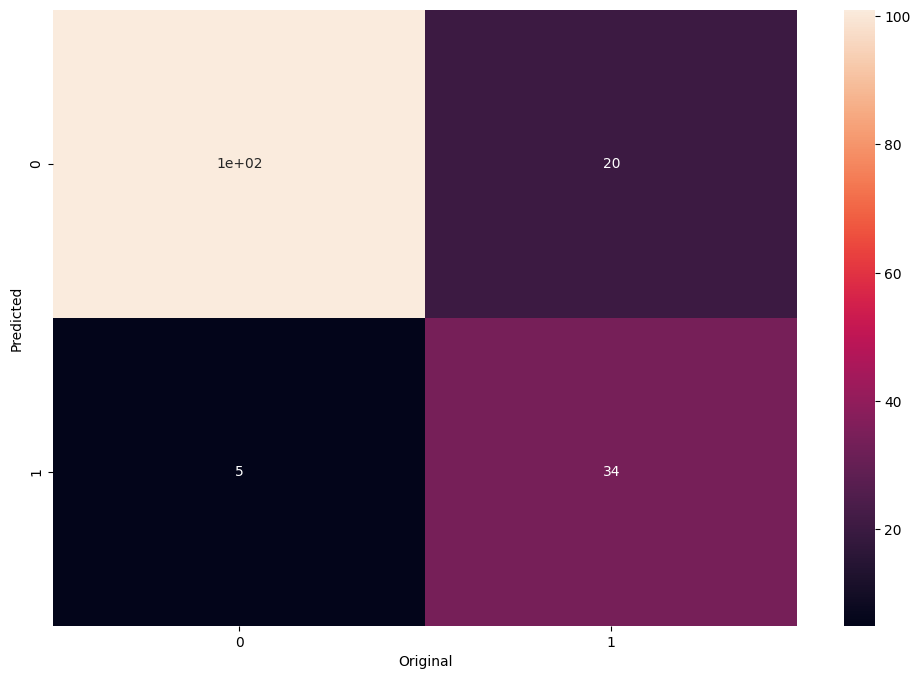

In [110]:
plt.figure(figsize=(12,8))
sb.heatmap(disp,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [111]:
import pickle

In [112]:
with open("model.pkl","wb") as f:
  pickle.dump(LOR,f)

# END OF PROJECT